In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.metrics import classification_report


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



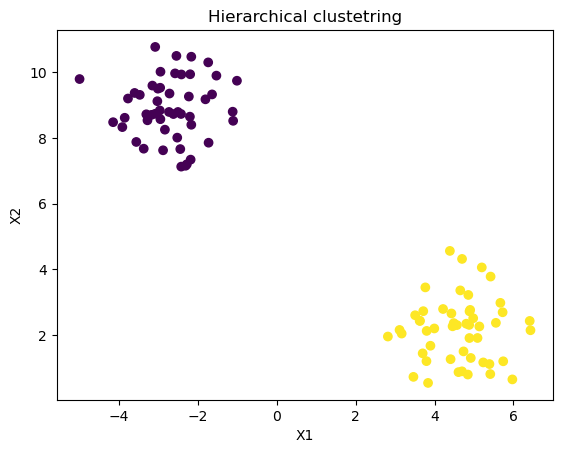

In [3]:
class HierachicalClustering:
    def __init__(self, num_clusters):
        self.num_clusters = num_clusters
        self.clusters = None
        self.centroids = None
    
    def fit(self, data):
        n_samples, n_features = data.shape
        self.clusters = [[i] for i in range(n_samples)]
        distance_matrix = np.linalg.norm(data[:, np.newaxis] - data, axis=2)
        while len(self.clusters)> self.num_clusters:
            min_dist = np.inf
            pair = None
            for i in range(len(self.clusters)):
                for j in range(i+1, len(self.clusters)):
                    dist = np.min(distance_matrix[self.clusters[i],:][:, self.clusters[j]])
                    if dist < min_dist:
                        min_dist = dist
                        pair = (i, j)
            i, j = pair
            self.clusters[i].extend(self.clusters[j])
            self.clusters.pop(j)
        self.centroids = np.array([np.mean(data[cluster], axis=0) for cluster in self.clusters])

    def predict(self, data):
        distances = np.linalg.norm(data[:, np.newaxis]-self.centroids, axis=2)
        labels = np.argmin(distances, axis=1)
        return labels
    
X, y = make_blobs(n_samples=100, centers=2, cluster_std=0.95, random_state=42)
model = HierachicalClustering(num_clusters=2)
model.fit(X)

labels_pred = model.predict(X)

print(classification_report(y, labels_pred))

plt.title("Hierarchical clustetring")
plt.xlabel("X1")
plt.ylabel("X2")
plt.scatter(X[:,0], X[:,1], c=labels_pred)
plt.show()
